In [3]:
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [4]:
def sigmoid_func(x):
    f_x = 1/(1+np.exp(-x))
    return f_x

np.random.seed(42)
# weight of the mice, g
x_data = np.random.randint(15 , 45 , 30).reshape(-1,1)
# obese/ non-obese mice
y_data = np.zeros_like(x_data)
# obese mice >30 g
y_data[x_data>30] = 1
# random outliers
y_data[[8,3],:] = 1
y_data[[20,21],:] = 0

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(random_state=0)
logreg.fit(x_data, y_data.ravel())

weight = logreg.coef_ 
weight = weight.reshape(-1,1)

intercept = logreg.intercept_

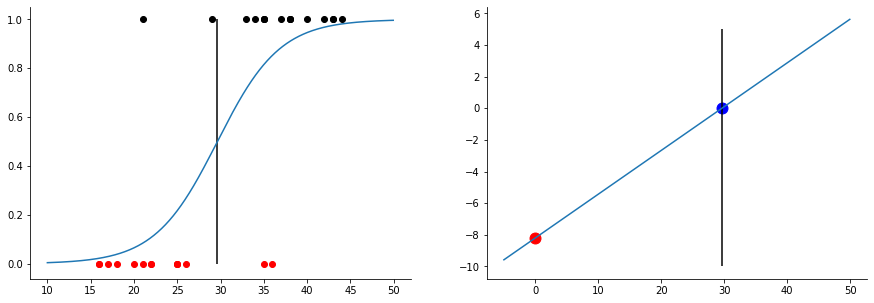

In [47]:
# plot logistic function based on weights and intercept returned by LogisticRegression()

x = np.arange(10, 50 , 0.05).reshape(-1,1)
y = sigmoid_func(x*weight+intercept)
y2 = logreg.predict_proba(x)

# y_scatter = sigmoid_func(x_scatter,1)
class0 = x_data[y_data==0]
class1 = x_data[y_data==1]

# decision boundary
x_boundary = -(intercept/weight)

fig, axes = plt.subplots(1, 2, figsize=(15, 5)) 

axes[0].scatter(class0,np.full_like(class0,0), c='r')
axes[0].scatter(class1,np.full_like(class1,1), c='k')
axes[0].plot(x,y)
axes[0].vlines(x_boundary,0,1,ls='-')


x1 = np.arange(-5, 50 , 0.05).reshape(-1,1)
y1 = sigmoid_func(x1*weight+intercept)
# ln(1/1-p)
logodds = np.log(y1/(1-y1))

axes[1].plot(x1, logodds)
axes[1].scatter(0,intercept, c='r', s=120)
axes[1].scatter(x_boundary,0, c='b', s=120)
axes[1].vlines(x_boundary,-10,5,ls='-')

axes = plt.gcf().get_axes()
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.savefig("Logreg.png")
plt.show()

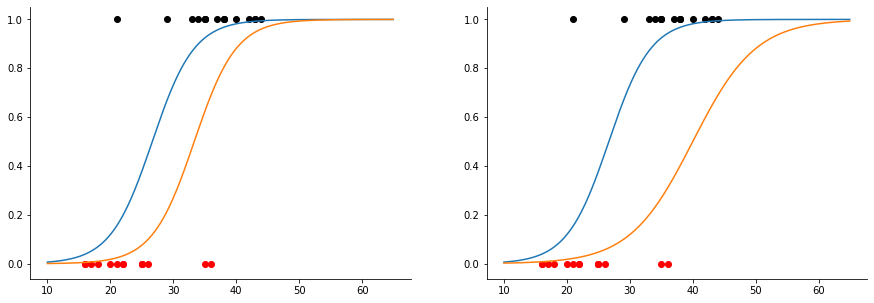

In [48]:
# plot logistic function based on weights and intercept returned by LogisticRegression()

weight1 = 0.3
weight2 = 0.2
intercept1 = -8
intercept2 = -10

x = np.arange(10, 65 , 0.05).reshape(-1,1)
y1 = sigmoid_func(x*weight1+intercept1)
y2 = sigmoid_func(x*weight1+intercept2)

y3 = sigmoid_func(x*weight1+intercept1)
y4 = sigmoid_func(x*weight2+intercept1)

# y_scatter = sigmoid_func(x_scatter,1)
class0 = x_data[y_data==0]
class1 = x_data[y_data==1]

# decision boundary
x_boundary = -(intercept/weight)

fig, axes = plt.subplots(1, 2, figsize=(15, 5)) 

axes[0].scatter(class0,np.full_like(class0,0), c='r')
axes[0].scatter(class1,np.full_like(class1,1), c='k')
axes[0].plot(x,y1)
axes[0].plot(x,y2)

axes[1].scatter(class0,np.full_like(class0,0), c='r')
axes[1].scatter(class1,np.full_like(class1,1), c='k')
axes[1].plot(x,y3)
axes[1].plot(x,y4)

axes = plt.gcf().get_axes()
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)    
    
plt.savefig("Logreg2.png")
plt.show()